In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import os

In [2]:
filename = 'london_merged.csv'
url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'

In [3]:
#source: #https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

def getDataset(filename):
    if filename not in os.listdir():
        !pip3 install wget
        import wget
        url = url
        downloaded_filename = wget.download(url)
        print(f'{downloaded_filename} file downloaded')
    else:
        print(f'{filename} already exists')
        
getDataset('london_merged.csv')

london_merged.csv already exists


In [4]:
#trip_df = pd.read_csv(url) -- alternative solution
trip_df = pd.read_csv(filename)
trip_df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [5]:
trip_df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [6]:
#simple fe
trip_df['timestamp'] = pd.to_datetime(trip_df['timestamp'])
trip_df['hour'] = trip_df['timestamp'].dt.hour
trip_df['is_daytime'] = trip_df['hour'].apply(lambda x: True if (x >= 7 and x < 19) else False)
trip_df['is_weekend'] = trip_df['is_weekend'].astype(bool)
trip_df['is_holiday'] = trip_df['is_holiday'].astype(bool)

In [7]:
#For the moment we'll drop the number of bike shares. We will use it later in the course as target column

trip_df.drop(['cnt', 'timestamp'], axis=1, inplace=True)

In [8]:
trip_df.shape, trip_df.dtypes

((17414, 10),
 t1              float64
 t2              float64
 hum             float64
 wind_speed      float64
 weather_code    float64
 is_holiday         bool
 is_weekend         bool
 season          float64
 hour              int64
 is_daytime         bool
 dtype: object)

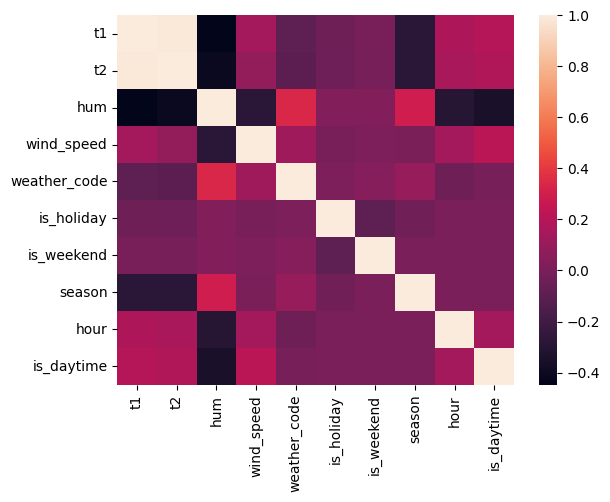

In [9]:
sns.heatmap(trip_df.corr())
plt.show()

## PoC for small dataset

In [10]:
mini_trip_df = trip_df[trip_df['season']==0].sample(n=50, random_state=42)

In [11]:
mini_trip_df

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,is_daytime
11125,14.5,14.5,55.0,5.5,1.0,False,False,0.0,10,True
10531,6.0,3.0,73.5,17.0,4.0,False,True,0.0,0,False
2874,13.5,13.5,77.0,21.0,7.0,True,False,0.0,2,False
1756,5.0,2.0,87.0,11.0,2.0,False,False,0.0,6,False
12029,14.0,14.0,79.5,12.0,3.0,False,True,0.0,2,False
10403,8.5,4.5,48.0,34.0,1.0,False,False,0.0,16,True
10657,9.0,6.5,79.0,15.0,7.0,True,False,0.0,6,False
11901,17.0,17.0,42.0,19.5,1.0,False,False,0.0,18,True
1903,7.0,5.0,71.0,10.0,2.0,False,False,0.0,9,True
2734,5.5,1.5,78.5,20.5,1.0,False,False,0.0,6,False


In [12]:
n_comp = len(mini_trip_df.columns)
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(mini_trip_df)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 1.0000
Individual variance contributions:
0.6610589265111106
0.16255819983049513
0.10819403319547596
0.0558729127869465
0.010675271998158823
0.0006341149934022687
0.000609002988427759
0.0002852320939110993
0.00011230560207176887
9.901913733190571e-37


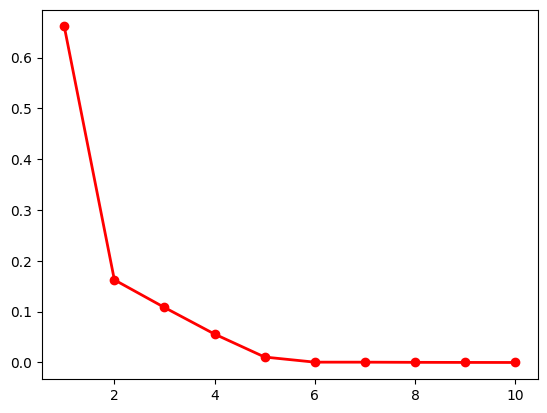

In [13]:
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.show()

In [14]:
pd.DataFrame(pca.components_.T, columns=[f'PC{x}' for x in range(n_comp)], index=mini_trip_df.columns)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
t1,0.112679,-0.023103,0.285254,0.498227,-0.043395,-6.174849e-01,-1.215026e-01,-5.086674e-01,-2.222475e-02,-0.000000e+00
t2,0.130788,-0.078139,0.415822,0.679339,0.003411,4.501871e-01,8.440995e-02,3.641068e-01,1.111249e-03,5.016672e-18
hum,-0.915678,0.263376,0.300134,0.030665,-0.024491,6.790993e-03,-4.887235e-03,-2.158434e-02,3.257696e-03,-8.185758e-19
wind_speed,0.226881,0.949392,-0.158058,0.133340,-0.055757,2.615095e-02,1.652480e-02,1.834298e-02,-4.004476e-03,1.051769e-19
weather_code,-0.029395,0.047148,-0.056553,0.070435,0.992942,-3.819801e-02,-4.604459e-03,-7.048852e-03,-3.591408e-02,1.108602e-17
is_holiday,-0.000922,0.005250,0.001509,0.015720,0.027606,-1.888895e-01,9.152190e-04,2.005475e-01,9.607605e-01,-2.964774e-16
is_weekend,0.003358,-0.012613,-0.007229,0.005146,0.014891,2.408951e-01,8.215878e-01,-4.941673e-01,1.493014e-01,-1.509212e-16
season,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-2.775558e-17,2.220446e-16,-1.387779e-17,1.110223e-16,1.000000e+00
hour,0.281133,0.142256,0.792050,-0.516056,0.083210,-5.784606e-03,6.218599e-03,-7.244001e-03,4.670772e-03,-2.426011e-18
is_daytime,0.018565,0.001677,-0.007979,-0.000782,0.023560,5.657842e-01,-5.502254e-01,-5.686463e-01,2.298149e-01,-1.014344e-17


We can leave PC0-PC4 with no loss in data quality!

### Bonus question

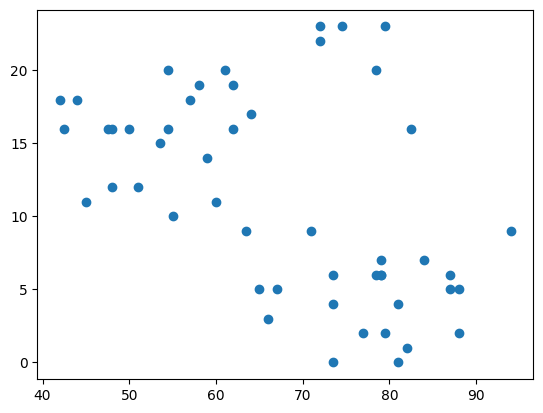

In [15]:
plt.scatter(mini_trip_df['hum'], mini_trip_df['hour'])
plt.show()

#how many clusters are there?
#2

## Comparing result to larger dataset

In [16]:
n_comp = len(trip_df.columns)
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(trip_df)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 1.0000
Individual variance contributions:
0.5939483419542883
0.1502806774560688
0.13321419706208334
0.1065384554853809
0.011339910198109248
0.0027332897999896074
0.0008518168227877162
0.0005284562874619833
0.0005113936019880482
5.346133184206465e-05


In [17]:
pd.DataFrame(pca.components_.T, columns=[f'PC{x}' for x in range(n_comp)], index=trip_df.columns)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
t1,0.212463,-0.434095,-0.410627,-0.029095,-0.000087,-0.038616,0.770640,-0.003885,-0.039538,0.002221
t2,0.233231,-0.558640,-0.479165,-0.026509,-0.022714,-0.002291,-0.633653,0.008026,0.033484,-0.000795
hum,-0.912818,-0.083942,-0.368775,0.131928,-0.074523,0.020194,0.013578,-0.012352,-0.004368,-0.000464
wind_speed,0.191998,0.694497,-0.671745,-0.150515,-0.077676,0.015623,-0.024447,0.005959,0.001794,-0.000255
weather_code,-0.045756,0.037067,-0.092468,0.015001,0.993421,-0.010519,-0.015554,0.022760,-0.000871,-0.000179
is_holiday,-0.000334,0.000486,0.000182,0.000262,0.000125,0.007503,-0.003853,0.001003,-0.035595,0.999330
is_weekend,-0.000712,0.000595,-0.001544,0.000595,0.006574,0.004434,0.048643,-0.223211,0.972891,0.035030
season,-0.021792,0.028045,-0.001052,0.017339,-0.014719,-0.996785,-0.026791,0.059071,0.019202,0.007982
hour,0.166297,0.089021,-0.077346,0.978706,-0.017485,0.016278,0.000839,0.001294,-0.000342,-0.000360
is_daytime,0.011836,0.004998,-0.003722,-0.000130,0.021106,-0.061801,-0.021788,-0.972573,-0.221675,-0.006540


## Creating final dataset

In [18]:
KEEP_PC = 4
new_pca_dataset = pd.DataFrame(X_pca[:, :KEEP_PC], columns=[f'PC{x}' for x in range(KEEP_PC)])
new_pca_dataset

,PC0,PC1,PC2,PC3
0,-26.974602,-0.165780,8.348559,-6.489763
1,-26.792176,-1.124711,8.888310,-5.403799
2,-30.886962,-4.584926,11.084291,-3.196223
3,-34.138373,-4.293335,10.161128,-1.727966
4,-26.800829,2.014791,9.257192,-2.598086
...,...,...,...,...
17409,-10.172774,11.251240,2.231045,8.533539
17410,-9.668237,12.766323,0.717740,9.226216
17411,-6.421056,14.652323,-0.897800,9.395755
17412,-4.164713,14.256702,0.618536,10.195155
